In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(x_train, y_train),(x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
y_test.shape

(10000,)

In [7]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
x_train[0].shape

(28, 28)

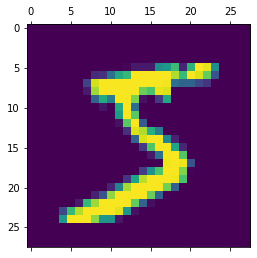

In [9]:
plt.matshow(x_train[0])

In [10]:
y_train[0]

5

In [11]:
x_train_flattened=x_train.reshape(len(x_train),28*28)
x_test_flattened=x_test.reshape(len(x_test),28*28)

# Simple deep learning

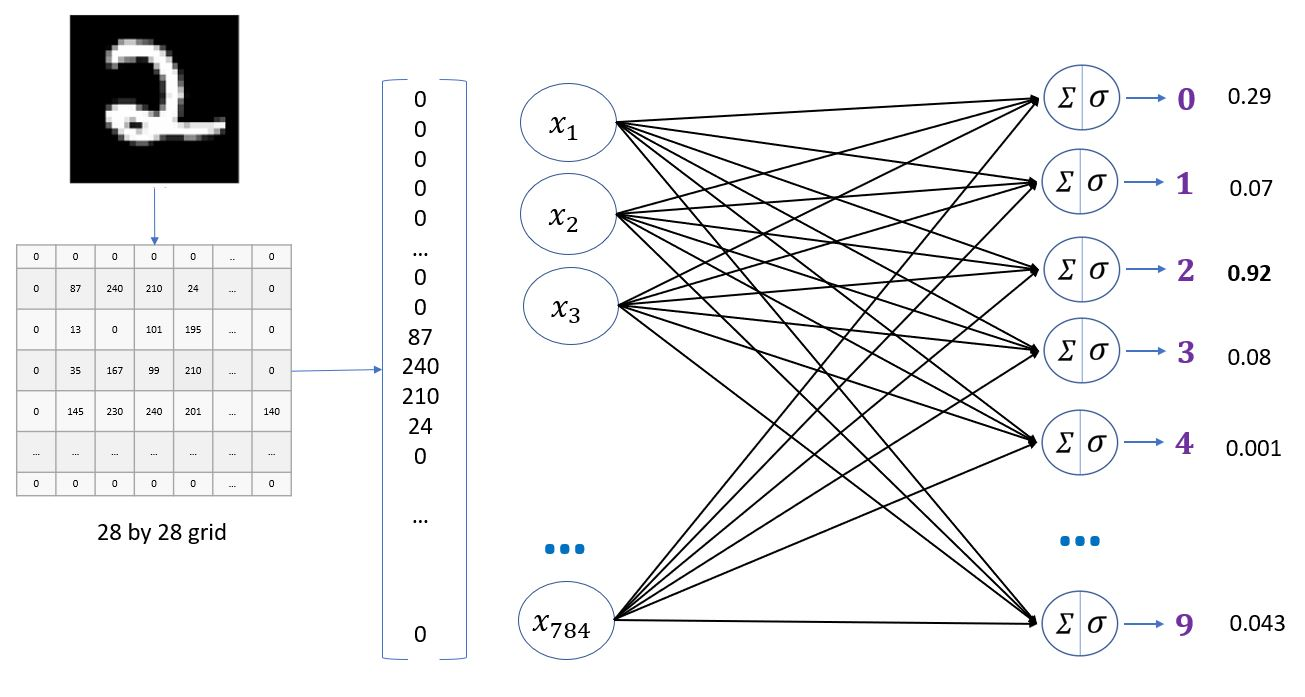

In [12]:
model= keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')          #10 for output
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_flattened, y_train, epochs=7)

Epoch 1/7
1875/1875 [==============================] - 2s 564us/step - loss: 9.7211 - accuracy: 0.8418
Epoch 2/7
1875/1875 [==============================] - 1s 558us/step - loss: 6.2646 - accuracy: 0.8782
Epoch 3/7
1875/1875 [==============================] - 1s 560us/step - loss: 5.6298 - accuracy: 0.8846
Epoch 4/7
1875/1875 [==============================] - 1s 560us/step - loss: 5.4518 - accuracy: 0.8847
Epoch 5/7
1875/1875 [==============================] - 1s 560us/step - loss: 5.4842 - accuracy: 0.8864
Epoch 6/7
1875/1875 [==============================] - 1s 577us/step - loss: 5.3289 - accuracy: 0.8885
Epoch 7/7
1875/1875 [==============================] - 1s 574us/step - loss: 5.1910 - accuracy: 0.8884


In [13]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 0s 517us/step - loss: 5.9072 - accuracy: 0.8828


[5.907232761383057, 0.8827999830245972]

In [14]:
y_predicted = model.predict(x_test_flattened)

313/313 [==============================] - 0s 435us/step


In [15]:

np.argmax(y_predicted[0])

3

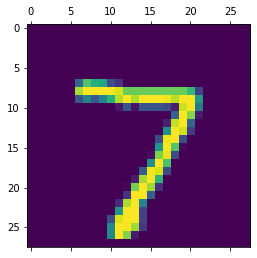

In [16]:
plt.matshow(x_test[0])

In [17]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [18]:
y_predicted_labels[:5]

[3, 0, 1, 0, 2]

In [19]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 979,    0,    0,    0,    0,    1,    0,    0,    0,    0],
       [   5, 1115,    4,    6,    2,    0,    0,    1,    2,    0],
       [ 305,  125,  588,    4,    6,    1,    1,    0,    2,    0],
       [ 147,   13,  447,  402,    0,    0,    0,    1,    0,    0],
       [  93,    7,  140,  185,  550,    0,    0,    0,    6,    1],
       [ 253,    9,  111,  284,   43,  191,    1,    0,    0,    0],
       [ 336,    8,  571,   20,   14,    9,    0,    0,    0,    0],
       [  61,   16,  122,  637,   54,   22,    0,  113,    1,    2],
       [ 132,   46,  436,  231,   22,   93,    0,    3,   11,    0],
       [  41,   13,   97,  553,  265,   12,    0,   21,    1,    6]])>

Text(69.0, 0.5, 'Truth')

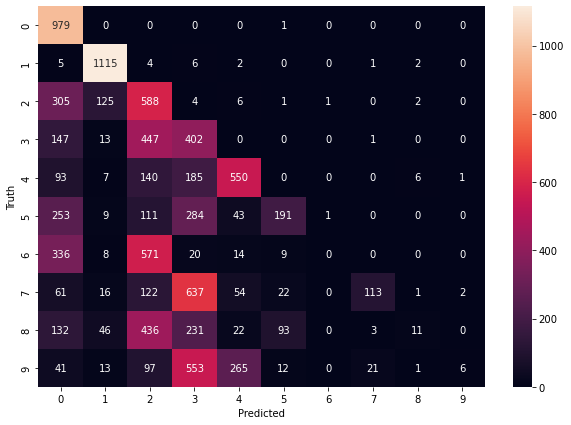

In [20]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Using hidden layer

In [21]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 662us/step - loss: 2.5146 - accuracy: 0.8181
Epoch 2/5
1875/1875 [==============================] - 1s 660us/step - loss: 0.4584 - accuracy: 0.8883
Epoch 3/5
1875/1875 [==============================] - 1s 660us/step - loss: 0.3308 - accuracy: 0.9148
Epoch 4/5
1875/1875 [==============================] - 1s 658us/step - loss: 0.2830 - accuracy: 0.9270
Epoch 5/5
1875/1875 [==============================] - 1s 687us/step - loss: 0.2459 - accuracy: 0.9353


In [22]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 0s 579us/step - loss: 0.2921 - accuracy: 0.9362


[0.29213079810142517, 0.9362000226974487]

313/313 [==============================] - 0s 484us/step


Text(69.0, 0.5, 'Truth')

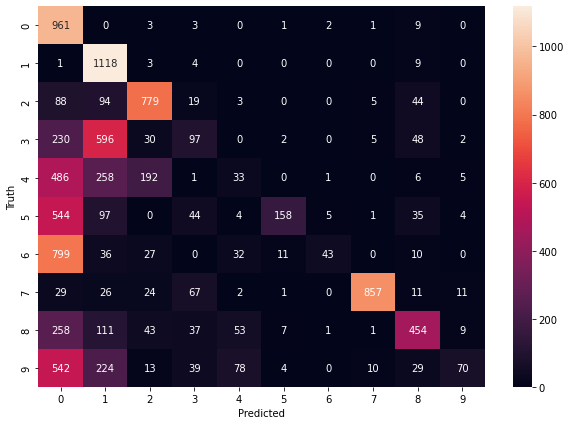

In [23]:
y_predicted = model.predict(x_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Using Flatten layer so that we don't have to call .reshape on input dataset

In [24]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=30)

Epoch 1/30
1875/1875 [==============================] - 2s 712us/step - loss: 2.4174 - accuracy: 0.8353
Epoch 2/30
1875/1875 [==============================] - 1s 701us/step - loss: 0.4033 - accuracy: 0.9018
Epoch 3/30
1875/1875 [==============================] - 1s 684us/step - loss: 0.3072 - accuracy: 0.9221
Epoch 4/30
1875/1875 [==============================] - 1s 688us/step - loss: 0.2628 - accuracy: 0.9330
Epoch 5/30
1875/1875 [==============================] - 1s 671us/step - loss: 0.2281 - accuracy: 0.9411
Epoch 6/30
1875/1875 [==============================] - 1s 671us/step - loss: 0.2214 - accuracy: 0.9446
Epoch 7/30
1875/1875 [==============================] - 1s 674us/step - loss: 0.2053 - accuracy: 0.9482
Epoch 8/30
1875/1875 [==============================] - 1s 678us/step - loss: 0.2022 - accuracy: 0.9498
Epoch 9/30
1875/1875 [==============================] - 1s 675us/step - loss: 0.1870 - accuracy: 0.9526
Epoch 10/30
1875/1875 [==============================] - 1s 676u

In [25]:

model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 572us/step - loss: 0.4664 - accuracy: 0.9454


[0.46642938256263733, 0.9453999996185303]

# 5 layers

In [26]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=30)

Epoch 1/30
1875/1875 [==============================] - 2s 785us/step - loss: 1.0229 - accuracy: 0.8689
Epoch 2/30
1875/1875 [==============================] - 1s 776us/step - loss: 0.2505 - accuracy: 0.9333
Epoch 3/30
1875/1875 [==============================] - 1s 784us/step - loss: 0.1895 - accuracy: 0.9483
Epoch 4/30
1875/1875 [==============================] - 1s 786us/step - loss: 0.1543 - accuracy: 0.9567
Epoch 5/30
1875/1875 [==============================] - 1s 783us/step - loss: 0.1262 - accuracy: 0.9633
Epoch 6/30
1875/1875 [==============================] - 1s 781us/step - loss: 0.1154 - accuracy: 0.9669
Epoch 7/30
1875/1875 [==============================] - 1s 783us/step - loss: 0.0992 - accuracy: 0.9713
Epoch 8/30
1875/1875 [==============================] - 1s 782us/step - loss: 0.0942 - accuracy: 0.9734
Epoch 9/30
1875/1875 [==============================] - 1s 782us/step - loss: 0.0830 - accuracy: 0.9761
Epoch 10/30
1875/1875 [==============================] - 1s 781u

In [27]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 654us/step - loss: 0.2021 - accuracy: 0.9697


[0.2021377831697464, 0.9696999788284302]

In [28]:
check=model.predict(x_test)

313/313 [==============================] - 0s 523us/step


In [29]:
check=[np.argmax(x) for x in check]

In [30]:
check[5:10]

[1, 4, 9, 5, 9]

In [31]:
y_test[5:10]

array([1, 4, 9, 5, 9], dtype=uint8)

# HYPERPARAMETER TUNING

In [32]:
from sklearn.model_selection import GridSearchCV
import numpy
import pandas as pd
from sklearn.model_selection import GridSearchCV 
from keras.models import Sequential
from keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')
from keras.wrappers.scikit_learn import KerasClassifier

In [33]:
def create_my_model():
    mymodel=Sequential()
    mymodel.add(Dense(100, input_shape=(784,), activation='relu'))
    mymodel.add(Dense(10, activation='sigmoid'))
    
    mymodel.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    
    return mymodel

In [34]:
model = KerasClassifier(build_fn=create_my_model)

In [35]:
# define the grid search parameters
batchSize = [10, 20, 40, 60, 80, 100]
epochs = [10, 30, 50]

In [36]:
parameter_grid = dict(epochs=epochs)


mygrid = GridSearchCV(estimator=model, param_grid=parameter_grid, n_jobs=-1, cv=3)
grid_result = mygrid.fit(x_train_flattened, y_train)

Epoch 1/30
1875/1875 [==============================] - 1s 674us/step - loss: 2.4887 - accuracy: 0.8285
Epoch 2/30
1875/1875 [==============================] - 1s 671us/step - loss: 0.4471 - accuracy: 0.8942
Epoch 3/30
1875/1875 [==============================] - 1s 697us/step - loss: 0.3099 - accuracy: 0.9211
Epoch 4/30
1875/1875 [==============================] - 1s 676us/step - loss: 0.2667 - accuracy: 0.9326
Epoch 5/30
1875/1875 [==============================] - 1s 672us/step - loss: 0.2427 - accuracy: 0.9364
Epoch 6/30
1875/1875 [==============================] - 1s 702us/step - loss: 0.2179 - accuracy: 0.9425
Epoch 7/30
1875/1875 [==============================] - 1s 684us/step - loss: 0.2116 - accuracy: 0.9453
Epoch 8/30
1875/1875 [==============================] - 1s 676us/step - loss: 0.1998 - accuracy: 0.9490
Epoch 9/30
1875/1875 [==============================] - 1s 668us/step - loss: 0.1941 - accuracy: 0.9504
Epoch 10/30
1875/1875 [==============================] - 1s 687u

In [37]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.944550 using {'epochs': 30}


# Optimizing Activation Function

In [38]:
# Function to create model
def create_my_model(optimizer='adam'):
    # create model
    mymodel = Sequential()
    mymodel.add(Dense(100, input_shape=(784,), activation='relu'))
    mymodel.add(Dense(10, activation='sigmoid'))
    # Compile model
    mymodel.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return mymodel

In [39]:
# create model
model = KerasClassifier(build_fn=create_my_model, epochs=50)

In [40]:
# define the grid search parameters
optimizer = ['SGD','Adadelta', 'RMSprop', 'Adagrad','Adam']
parameter_grid = dict(optimizer=optimizer)

In [41]:
grid = GridSearchCV(estimator=model, param_grid=parameter_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(x_train_flattened, y_train)

Epoch 1/50
1875/1875 [==============================] - 2s 772us/step - loss: 2.4476 - accuracy: 0.8692
Epoch 2/50
1875/1875 [==============================] - 1s 750us/step - loss: 0.5846 - accuracy: 0.9249
Epoch 3/50
1875/1875 [==============================] - 1s 762us/step - loss: 0.4915 - accuracy: 0.9392
Epoch 4/50
1875/1875 [==============================] - 1s 798us/step - loss: 0.4444 - accuracy: 0.9451
Epoch 5/50
1875/1875 [==============================] - 1s 763us/step - loss: 0.4194 - accuracy: 0.9510
Epoch 6/50
1875/1875 [==============================] - 1s 749us/step - loss: 0.4026 - accuracy: 0.9535
Epoch 7/50
1875/1875 [==============================] - 1s 750us/step - loss: 0.4046 - accuracy: 0.9572
Epoch 8/50
1875/1875 [==============================] - 2s 811us/step - loss: 0.3804 - accuracy: 0.9600
Epoch 9/50
1875/1875 [==============================] - 2s 817us/step - loss: 0.3551 - accuracy: 0.9636
Epoch 10/50
1875/1875 [==============================] - 2s 815u

In [42]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.959450 using {'optimizer': 'RMSprop'}
